In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
x = iris_dataset.data
y = iris_dataset.target

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
variables = iris_dataset.feature_names
df = pd.DataFrame(x, columns=variables)

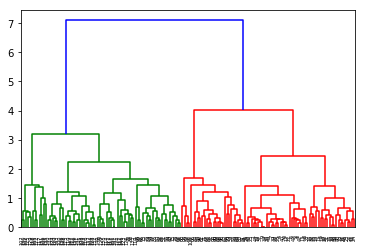

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram
row_clusters = linkage(df.values, metric='euclidean',
                       method='complete')
row_dendr = dendrogram(row_clusters)

In [17]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(x)
print('Cluster labels: %s' % labels)

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [16]:
?AgglomerativeClustering

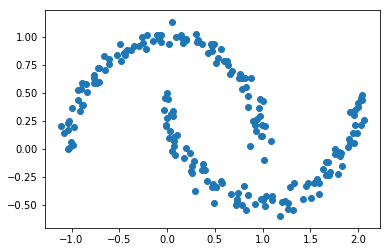

In [18]:
#三種類の手法の比較
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=200,noise=0.05)
plt.scatter(X[:,0],X[:,1])

(-0.97497463689058983,
 1.0496426363342068,
 -0.5697832799892989,
 0.86976012193215857)

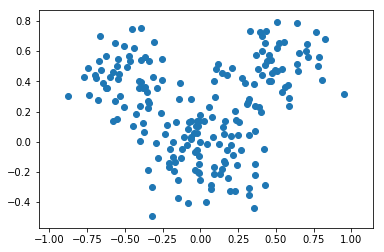

In [78]:
cov = np.array([[.05,0], [0,.05]])
x1, y1 = np.random.multivariate_normal([0,0], cov, 100).T
x2, y2 = np.random.multivariate_normal([.5,.5], cov/2, 50).T
x3, y3 = np.random.multivariate_normal([-.5,.5], cov/2, 50).T
x = np.concatenate((x1,x2,x3))
y = np.concatenate((y1,y2,y3))
plt.scatter(x, y)
plt.axis('equal')

In [79]:
np.concatenate(([[1,2]],[[3,4]]))

array([[1, 2],
       [3, 4]])

In [80]:
X = np.concatenate(([x],[y])).T

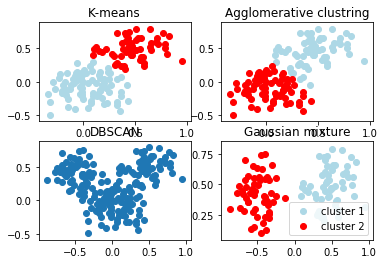

In [81]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import mixture

f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)
#KMeans
km=KMeans(n_clusters=3)
y_km=km.fit_predict(X)
ax1.scatter(X[y_km==0,0],X[y_km==0,1],c='lightblue',label='cluster 1')
ax1.scatter(X[y_km==1,0],X[y_km==1,1],c='red',label='cluster 2')
ax1.set_title('K-means')
#階層クラスタ
ac=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
y_ac=ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],X[y_ac==0,1],c='lightblue',label='cluster 1')
ax2.scatter(X[y_ac==1,0],X[y_ac==1,1],c='red',label='cluster 2')
ax2.set_title('Agglomerative clustring')
#DBSCAN
db=DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db=db.fit_predict(X)
clusters=np.unique(y_db)
for c in clusters:
    ax3.scatter(X[y_db==c,0],X[y_db==c,1],label='cluster %d' % c)
ax3.set_title('DBSCAN')
#混合ガウス
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
y_gmm=gmm.fit(X).predict(X)
ax4.scatter(X[y_gmm==0,0],X[y_gmm==0,1],c='lightblue',label='cluster 1')
ax4.scatter(X[y_gmm==1,0],X[y_gmm==1,1],c='red',label='cluster 2')
ax4.set_title('Gaussian mixture')

plt.legend()